# SUPPORT  VECTOR REGRESSION

## Importing The Libraries And Dataset

In [1]:
# IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# READING OUR DATA

data = pd.read_csv('Position_Salaries.csv')

In [3]:
# CHECKING OUR DATA

data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
# DIVIDING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

X = data.iloc[:,1].values.reshape(-1,1)
y = data.iloc[:,2].values.reshape(-1,1)


In [10]:
# CHECKING OUR INDEPENDENT VARIABLE

X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
# CHECHKING OUR DEPENDENT VARIABLE

y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Importing The Standard Scaler For Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler   # IMPORTING THE STANDARD SCALER
sc1 = StandardScaler()                             # OBJECT FOR SCALING X
sc2 = StandardScaler()                             # OBJECT FOR SCALING y

In [16]:
X = sc1.fit_transform(X)       # SCALED X VALUES
y = sc2.fit_transform(y)       # SCALED y VALUES

In [17]:
# CHECKING X AGAIN

X 

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [18]:
# CHECKING y AGAIN

y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Importing The support Vector Regressor, Training & Making Predictions

In [19]:
from sklearn.svm import SVR                 # IMPORTING THE SUPPORT VECTOR REGRESSOR
regressor = SVR(kernel = 'rbf')             # CREATING THE INSTANCE OR OBJECT OF SVR

In [23]:
# FITTING THE SUPPORT VECTOR REGRESSOR

regressor.fit(X,y)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
# PREDICTIONG THE NEW RESULT

sc2.inverse_transform(regressor.predict(sc1.transform([[6.5]])))

array([170370.0204065])

## Visualisation Of Data & Regressor

Text(0.5, 1.0, 'Bluff Or Real (SVR)')

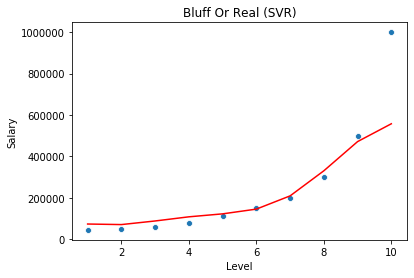

In [30]:
sns.scatterplot(x = 'Level', y = 'Salary', data = data)          # DATA
plt.plot(sc1.inverse_transform(X), sc2.inverse_transform(regressor.predict(X)), color = 'red') # REGRESSOR
plt.title('Bluff Or Real (SVR)')